# MODEL 2

Image Classification With CNN

## Importing all lib


In [ ]:
import gdown
# https://drive.google.com/file/d//view?usp=sharing
file_id = '1nM7t5VaSkvz2XZSrzaNSMWU4TM1GI0sL'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'DATA.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1nM7t5VaSkvz2XZSrzaNSMWU4TM1GI0sL
From (redirected): https://drive.google.com/uc?id=1nM7t5VaSkvz2XZSrzaNSMWU4TM1GI0sL&confirm=t&uuid=874be4ba-342a-40b4-b879-2080851fad92
To: /content/DATA.zip
100%|██████████| 66.1M/66.1M [00:01<00:00, 59.2MB/s]


'DATA.zip'

In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from tensorflow.keras import models, layers, optimizers, losses, metrics
from pathlib import Path


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
local_zip = 'DATA.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
# Specify the parent directory containing train and test subdirectories
train_dir = '/content/DATA/DATA/train'
test_dir = '/content/DATA/DATA/testing'

# Initialize counters
total_train_images = 0
total_test_images = 0

# Count images in train set
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    print(f"Train - {category}: {num_images} images")
    total_train_images += num_images

# Count images in test set
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    num_images = len(os.listdir(category_dir))
    print(f"Test - {category}: {num_images} images")
    total_test_images += num_images

# Calculate total number of images
print(f"Total train images: {total_train_images}")
print(f"Total test images: {total_test_images}")

Train - Acne: 168 images
Train - Eczemaa: 169 images
Train - Basal Cell Carcinoma: 168 images
Train - Rosacea: 169 images
Train - Actinic Keratosis: 169 images
Test - Acne: 16 images
Test - Eczemaa: 16 images
Test - Basal Cell Carcinoma: 16 images
Test - Rosacea: 16 images
Test - Actinic Keratosis: 16 images
Total train images: 843
Total test images: 80


## Data Visualization

In [ ]:
# Train Data Classes
classes = os.listdir(train_dir)
classes = sorted(classes)
print(f"Total classes = {len(classes)}")
print(f"Classes: {classes}")

Total classes = 5
Classes: ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczemaa', 'Rosacea']


In [ ]:
val_dir = '/content/DATA/DATA/val'
# Create validation directories
os.makedirs(val_dir, exist_ok=True)
for category in os.listdir(train_dir):
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Split train data into train and validation sets
val_split_ratio = 0.2

for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    images = os.listdir(category_path)
    random.shuffle(images)

    val_size = int(len(images) * val_split_ratio)
    val_images = images[:val_size]
    train_images = images[val_size:]

    for image in val_images:
        src = os.path.join(category_path, image)
        dst = os.path.join(val_dir, category, image)
        shutil.move(src, dst)

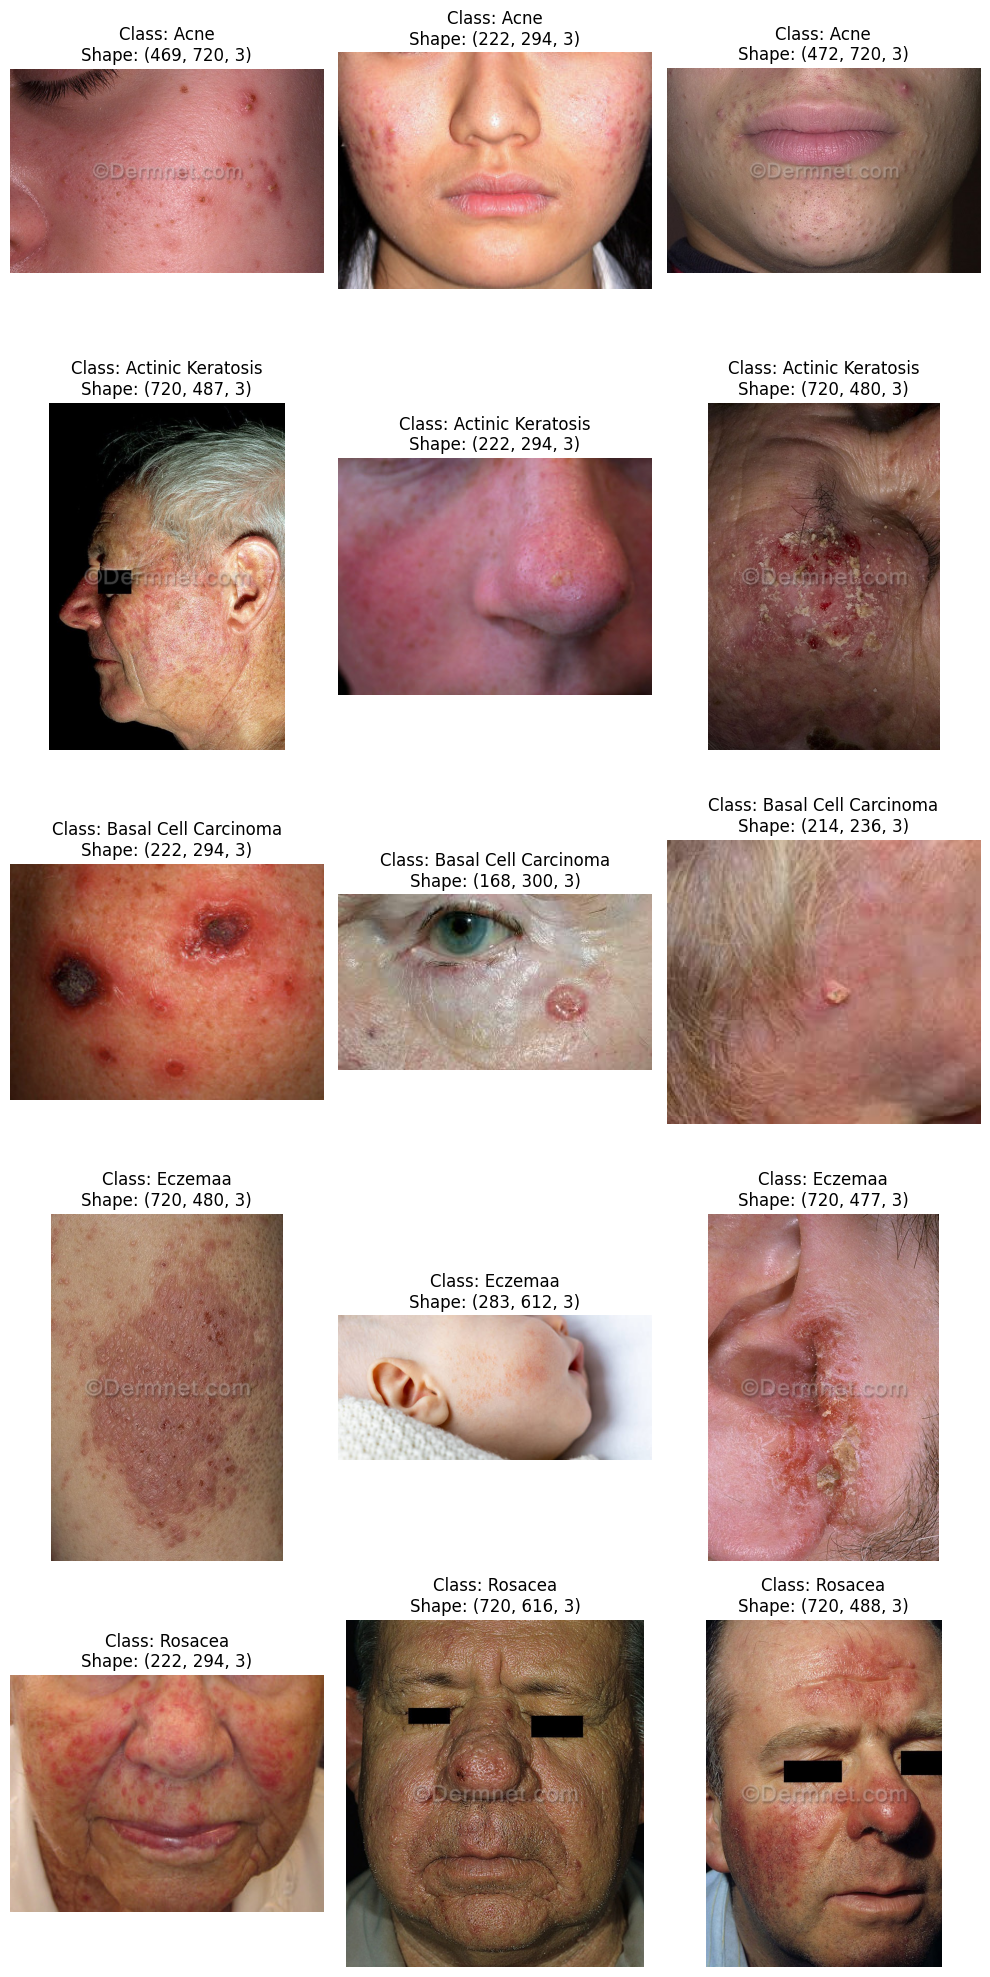

In [ ]:
# visualize some images from our training set.
NUM_IMAGES = 3

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10, 20))

p = 0

for c in classes:
    img_path_class = list(Path(os.path.join(train_dir,c)).glob("*.jpg"))
    img_selected = random.choices(img_path_class, k = NUM_IMAGES)
    for i,j in enumerate(img_selected):
        img_bgr = cv2.imread(str(j))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_rgb)
        ax[p,i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
        ax[p,i].axis('off')

    p += 1

fig.tight_layout()
fig.show()

In [ ]:
# Test Data Classes
classes = os.listdir(test_dir)
classes = sorted(classes)
print(f"Total classes = {len(classes)}")
print(f"Classes: {classes}")

Total classes = 5
Classes: ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczemaa', 'Rosacea']


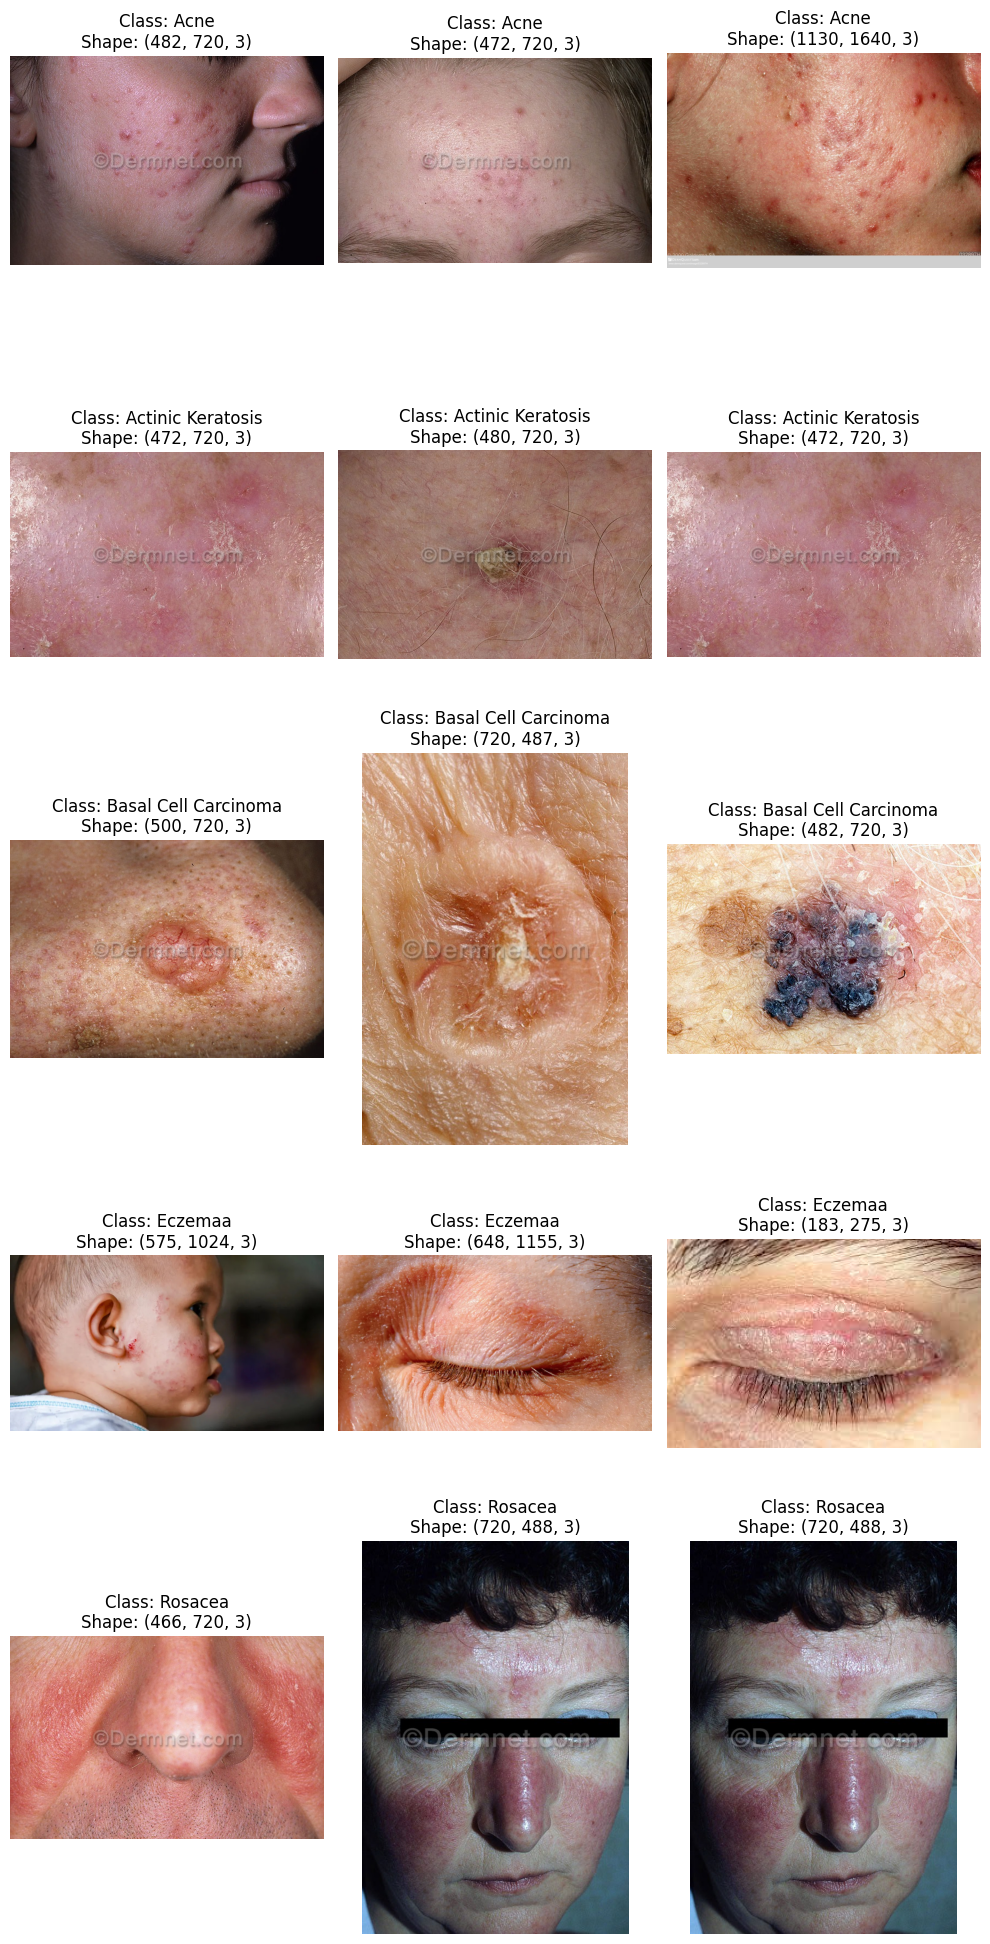

In [ ]:
# visualize some images from our testing set.
NUM_IMAGES = 3

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10, 20))

p = 0

for c in classes:
    img_path_class = list(Path(os.path.join(test_dir,c)).glob("*.jpg"))
    img_selected = random.choices(img_path_class, k = NUM_IMAGES)
    for i,j in enumerate(img_selected):
        img_bgr = cv2.imread(str(j))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_rgb)
        ax[p,i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
        ax[p,i].axis('off')

    p += 1

fig.tight_layout()
fig.show()

In [ ]:
# Define your data directory
data_dir = '/content/DATA/DATA'

# List all class subdirectories
class_subdirs = os.listdir(data_dir)

# Initialize empty lists for images and labels
train_images = []
train_labels = []

# Load images and labels
for class_subdir in class_subdirs:
    class_path = os.path.join(data_dir, class_subdir)
    class_images = os.listdir(class_path)
    for image_filename in class_images:
        image_path = os.path.join(class_path, image_filename)
        image = cv2.imread(image_path)  # Read the image using OpenCV (adjust as needed)
        train_images.append(image)
        train_labels.append(class_subdir)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)



In [ ]:
# Compute dataset mean and standard deviation for standardization
def compute_dataset_mean_std(generator, steps):
    sum_pixels = 0.0
    sum_squared_pixels = 0.0
    total_samples = 0

    for i in range(steps):
        images, _ = next(generator)
        sum_pixels += np.sum(images, axis=(0, 1, 2))
        sum_squared_pixels += np.sum(np.square(images), axis=(0, 1, 2))
        total_samples += images.shape[0]

    mean = sum_pixels / (total_samples * images.shape[1] * images.shape[2])
    std = np.sqrt(sum_squared_pixels / (total_samples * images.shape[1] * images.shape[2]) - np.square(mean))
    return mean, std

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Prepare a generator to compute mean and std
temp_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(450, 450),
    batch_size=15,
    class_mode='categorical',
    shuffle=True
)

# Compute mean and std
mean, std = compute_dataset_mean_std(temp_generator, steps=len(temp_generator))

Found 678 images belonging to 5 classes.


KeyboardInterrupt: 

In [ ]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=lambda x: (x - mean) / std
)

In [ ]:

# Train Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (450, 450),
    batch_size=20,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(450, 450),
    batch_size=20,
    class_mode='categorical'
)

Found 678 images belonging to 5 classes.
Found 165 images belonging to 5 classes.


## model 2 punya surya

In [ ]:
# Model Definition
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(450, 450, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        # tf.keras.layers.Dense(128, activation='relu'),
        # tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    Optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

    model.compile(
        optimizer= Optimizer, #'Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    return model


## Model 2 percobaan ke 2

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(450, 450, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
    ])

Optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(
    optimizer= Optimizer, #'Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

## Train the Model

In [ ]:
# Create and compile the model
# model = create_model()
model.summary()
# Callbacks
#callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
#]

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    #callbacks=callbacks
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 450, 450, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 225, 225, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 225, 225, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 225, 225, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     7

In [ ]:
# Data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(450, 450),
    batch_size=10,
    class_mode='categorical'
)

Found 80 images belonging to 5 classes.


8/8 [==============================] - 1s 103ms/step - loss: 1.1712 - accuracy: 0.5875
Test accuracy: 0.5874999761581421


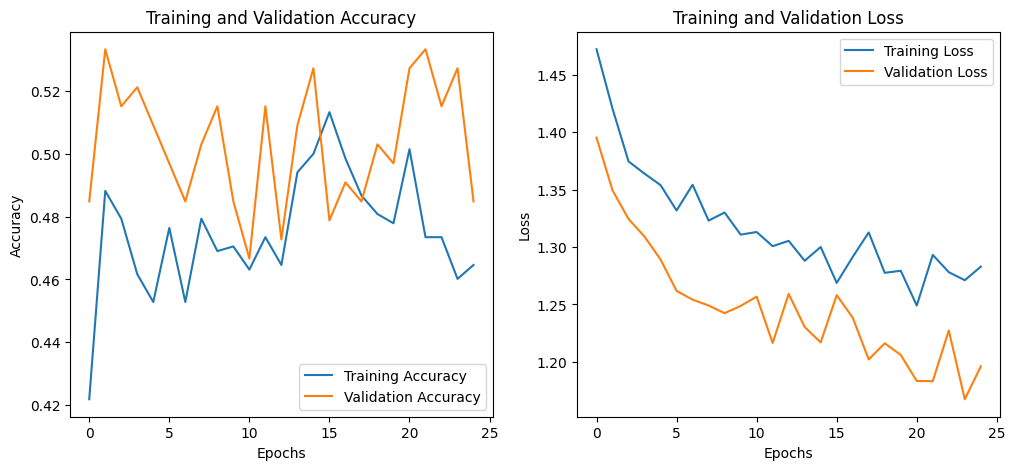

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

# Plotting training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

1/1 [==============================] - 0s 19ms/step


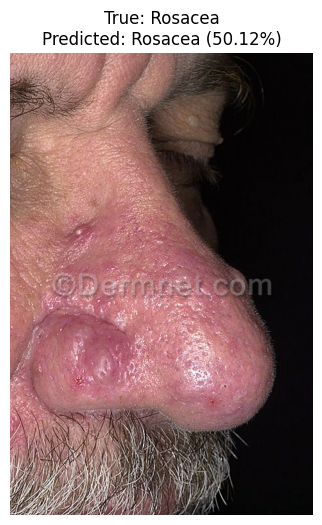

In [ ]:
from tensorflow.keras.preprocessing import image
def predict_single_image(model, test_dir, classes):
    # Choose a random class
    c = random.choice(classes)
    img_path_class = list(Path(os.path.join(test_dir, c)).glob("*.jpg"))
    img_path = random.choice(img_path_class)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(450, 450))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class probabilities
    predictions = model.predict(img_array)[0]
    predicted_class = classes[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    # Display the image and the prediction
    plt.figure(figsize=(6, 6))
    img_rgb = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"True: {c}\nPredicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# Example usage
predict_single_image(model, test_dir, classes)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model.save('model.h5')
# Load the H5 model
model = load_model('model.h5')
model.summary()

model.save('saved_model')
# Save the model in TensorFlow SavedModel format
# model.save('saved_model')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 450, 450, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 225, 225, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 225, 225, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 225, 225, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     7

In [ ]:
# Save the model in TensorFlow.js format
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 113.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
   

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model saved_model tfjs_model


2024-06-16 03:56:26.237579: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 03:56:27.290475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-16 03:56:29.404560: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-16 03:56:29.500343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. 

In [ ]:
import zipfile
import os
# Define the name for your zip file
zip_file_name = 'model_files.zip'

# Path to the directory containing your .bin and JSON files
directory = '/content/tfjs_model'

# List all files in the directory
files = os.listdir(directory)

# Filter out .bin and .json files
files_to_zip = [f for f in files if f.endswith('.bin') or f.endswith('.json')]

# Path to save the zip file
zip_file_path = '/content/' + zip_file_name

# Create a zip file
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    # Add each file to the zip
    for file in files_to_zip:
        zipf.write(os.path.join(directory, file), file)

print("Zip file created successfully:", zip_file_path)

Zip file created successfully: /content/model_files.zip


In [ ]:
from google.colab import files

# Download model.json
# files.download('/content/model_files.zip')

# Download model weights
files.download('/content/model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Belom perlu

In [ ]:
# model.save('/content/driver/MyDrive/Colab Notebooks/model.h5')

In [ ]:
# # # Save the model in HDF5 format as well
# model.save('/tmp/DATA/model.h5')

In [ ]:
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model, '/tmp/DATA/model_js')

In [ ]:
import tensorflowjs as tfjs

# Load the Keras model
model = tf.keras.models.load_model('/tmp/DATA/model.h5')

# Save the model in TensorFlow.js format
tfjs.converters.save_keras_model(model, '/tmp/DATA/tfjs_model')


failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
# Save the model architecture to JSON
import tensorflowjs as tfjs
model_json = model.to_json()
with open("/tmp/DATA/model.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights to HDF5
model.save_weights("/tmp/DATA/model.weights.h5")

print("Saved model to disk")

from google.colab import files

# Download model.json
files.download('/tmp/DATA/model.json')

# Download model weights
files.download('/tmp/DATA/model.weights.h5')

In [ ]:
# Save the weights to HDF5
model.save_weights("/content/driver/MyDrive/Colab Notebooks/model.weights.h5")

In [ ]:
import zipfile
import os

# Path to the directory containing your .bin and JSON files
directory = '/tmp/DATA'

# List all files in the directory
files = os.listdir(directory)

# Filter out .bin and .json files
files_to_zip = [f for f in files if f.endswith('.bin') or f.endswith('.json')]